In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'TRAIN_DATA_HIST_EQ',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 58502 files belonging to 9 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'VALID_DATA_HIST_EQ',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14640 files belonging to 9 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [15]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1624s 886ms/step - accuracy: 0.5320 - loss: 1.3669 - val_accuracy: 0.8566 - val_loss: 0.4122
Epoch 2/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1718s 939ms/step - accuracy: 0.8706 - loss: 0.3798 - val_accuracy: 0.9258 - val_loss: 0.2207
Epoch 3/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1567s 857ms/step - accuracy: 0.9299 - loss: 0.2064 - val_accuracy: 0.9457 - val_loss: 0.1708
Epoch 4/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1566s 856ms/step - accuracy: 0.9563 - loss: 0.1324 - val_accuracy: 0.9551 - val_loss: 0.1431
Epoch 5/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1648s 901ms/step - accuracy: 0.9687 - loss: 0.0907 - val_accuracy: 0.9548 - val_loss: 0.1474
Epoch 6/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1480s 809ms/step - accuracy: 0.9739 - loss: 0.0745 - val_accuracy: 0.9477 - val_loss: 0.1751
Epoch 7/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1482s 810ms/step - accuracy: 0.9786 - loss: 0.0660 - val_accuracy: 0.9464 - val_loss: 0.1949
Epoch 8/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1485s 812ms/s

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1829/1829 ━━━━━━━━━━━━━━━━━━━━ 372s 203ms/step - accuracy: 0.9946 - loss: 0.0189
Training accuracy: 0.9951967597007751


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

458/458 ━━━━━━━━━━━━━━━━━━━━ 93s 204ms/step - accuracy: 0.9669 - loss: 0.1243
Validation accuracy: 0.9669398665428162


In [20]:
cnn.save('Plant_type_identification_model_M1.h5')

In [21]:
cnn.save('Plant_type_identification_model_M1.keras')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6813271045684814,
  0.893730103969574,
  0.939027726650238,
  0.9595227241516113,
  0.9719838500022888,
  0.9769922494888306,
  0.981692910194397,
  0.9857099056243896,
  0.9855389595031738,
  0.9878636598587036],
 'loss': [0.9296695590019226,
  0.3167590796947479,
  0.18103645741939545,
  0.11987166106700897,
  0.08272527903318405,
  0.06778402626514435,
  0.05457470193505287,
  0.04209791123867035,
  0.04243110865354538,
  0.037048399448394775],
 'val_accuracy': [0.8565573692321777,
  0.9257513880729675,
  0.9456967115402222,
  0.9550546407699585,
  0.9547814130783081,
  0.9477459192276001,
  0.9464480876922607,
  0.9586748480796814,
  0.9665300250053406,
  0.9669398665428162],
 'val_loss': [0.4121699333190918,
  0.22073836624622345,
  0.17080239951610565,
  0.14312633872032166,
  0.14738842844963074,
  0.17514795064926147,
  0.19494497776031494,
  0.14069156348705292,
  0.11429242044687271,
  0.1271963119506836]}

In [23]:
#Recording History in json
import json
with open('planttypepredicterM1.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


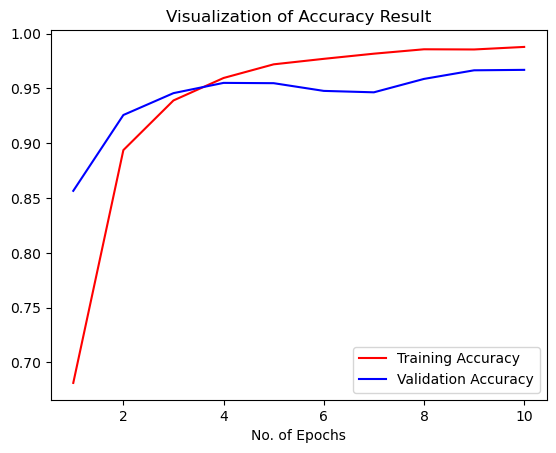

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()